In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing

In [2]:
df = pd.read_csv('D:\origin-source-code-bill\Sonar\seatunnel_for_test_data.csv')

In [3]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha' , 'open_time', 'closed_time', 'begin_time', 'end_time','total_time'])]

In [4]:
X

,commits,additions,deletions,changed_files,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers
0,1,22,12,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0
1,1,22,12,3,500.0,262.0,262.0,304.0,304.0,501.0,262.0,262.0,304.0,693.0
2,1,22,12,3,500.0,262.0,262.0,304.0,304.0,499.0,261.0,261.0,304.0,693.0
3,1,22,12,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0
4,1,22,12,3,500.0,262.0,262.0,304.0,304.0,501.0,261.0,261.0,304.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,5,85,24,18,33.0,15.0,15.0,7.0,7.0,69.0,45.0,45.0,28.0,370.0
1309,5,85,24,18,33.0,15.0,15.0,7.0,7.0,32.0,17.0,17.0,11.0,118.0
1310,4,191,40,12,16.0,14.0,14.0,7.0,7.0,31.0,13.0,13.0,10.0,113.0
1311,2,69,49,9,14.0,12.0,12.0,8.0,8.0,33.0,15.0,15.0,7.0,107.0


In [5]:
cl = list(df['total_time'])


In [6]:
scaler = preprocessing.StandardScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [7]:
df_scaler

array([[-0.48737134, -0.48737134, -0.48737134, ..., -0.13813435,
        -0.37095901, -0.48737134],
       [-0.20848883, -0.20848883, -0.20848883, ..., -0.10580847,
        -0.17993276, -0.19998277],
       [-0.19226464, -0.19226464, -0.19226464, ..., -0.11522719,
        -0.09046515, -0.22528069],
       ...,
       [ 1.23057356,  1.24229169,  1.23057356, ..., -1.67552348,
        -1.65208721, -1.65208721],
       [ 1.4325255 ,  1.4325255 ,  1.4325255 , ..., -1.45790896,
        -1.48740319, -1.48740319],
       [ 1.33891964,  1.33891964,  1.33891964, ..., -1.55641372,
        -1.58636544, -1.61132521]])

In [8]:
scaler_1 = preprocessing.MinMaxScaler()
scaler_1

MinMaxScaler()

In [9]:
df_scaler

array([[-0.48737134, -0.48737134, -0.48737134, ..., -0.13813435,
        -0.37095901, -0.48737134],
       [-0.20848883, -0.20848883, -0.20848883, ..., -0.10580847,
        -0.17993276, -0.19998277],
       [-0.19226464, -0.19226464, -0.19226464, ..., -0.11522719,
        -0.09046515, -0.22528069],
       ...,
       [ 1.23057356,  1.24229169,  1.23057356, ..., -1.67552348,
        -1.65208721, -1.65208721],
       [ 1.4325255 ,  1.4325255 ,  1.4325255 , ..., -1.45790896,
        -1.48740319, -1.48740319],
       [ 1.33891964,  1.33891964,  1.33891964, ..., -1.55641372,
        -1.58636544, -1.61132521]])

In [10]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [12]:
sil_avg

0.4286

In [13]:
number_of_cluster

[[0.6781, 2],
 [0.6908, 3],
 [0.655, 4],
 [0.5979, 5],
 [0.2513, 6],
 [0.3235, 7],
 [0.3194, 8],
 [0.3154, 9],
 [0.3683, 10],
 [0.4286, 11],
 [0.4286, 12],
 [0.4286, 13]]

In [14]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 3


In [15]:
km

KMeans(n_clusters=13)

In [16]:
import numpy as np

from sklearn.datasets import make_blobs

np.random.seed(0)

batch_size = 45
centers = number_of_cluster
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=30000, centers=centers, cluster_std=0.7)

In [17]:
centers

[[0.6781, 2],
 [0.6908, 3],
 [0.655, 4],
 [0.5979, 5],
 [0.2513, 6],
 [0.3235, 7],
 [0.3194, 8],
 [0.3154, 9],
 [0.3683, 10],
 [0.4286, 11],
 [0.4286, 12],
 [0.4286, 13]]

In [18]:
max(number_of_cluster)[1]

3

In [19]:
import time

from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=max(number_of_cluster)[1], n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [20]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=max(number_of_cluster)[1],
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [21]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

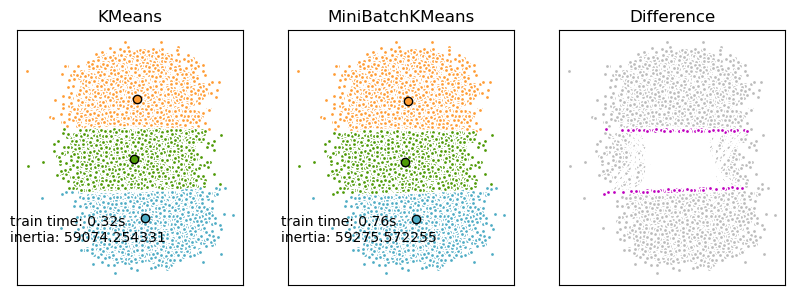

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(X[identical, 0], X[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()